## IRIS FLOWER CLASSIFICATION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

In [3]:
iris = pd.read_csv ("C:/Users/akinw/OneDrive/Documents/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploratory Data Analysis

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [7]:
#check for missing value
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#check for duplicates
iris.duplicated().sum()

iris = iris.drop_duplicates()

In [9]:
#view the duplicates again
iris.duplicated().sum()

0

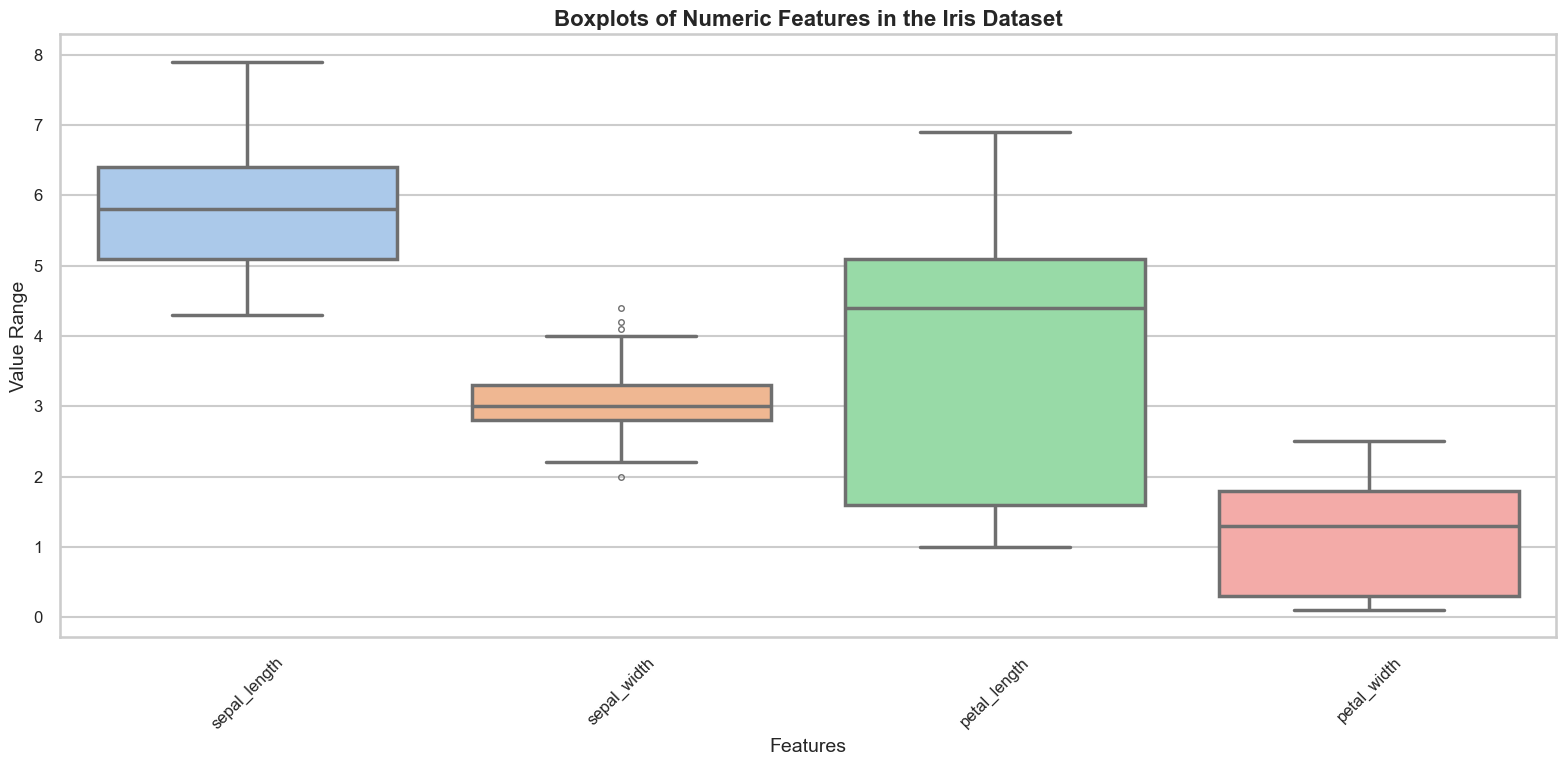

In [10]:
#check for outliers
# Set Seaborn style
sns.set(style="whitegrid", context="talk", palette="pastel")

# Create the boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=iris, linewidth=2.5, fliersize=4)

# Beautify the axes
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Boxplots of Numeric Features in the Iris Dataset", fontsize=16, weight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Value Range", fontsize=14)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

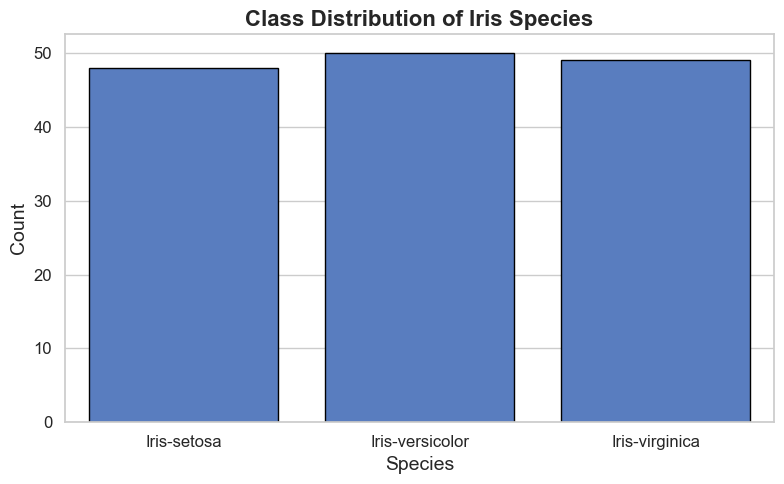

In [11]:
# Set seaborn style
sns.set(style="whitegrid", context="notebook", palette="muted")

# Create the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=iris, x='species', edgecolor='black')

# Customize plot elements
plt.title('Class Distribution of Iris Species', fontsize=16, weight='bold')
plt.xlabel('Species', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve spacing
plt.tight_layout()
plt.show()

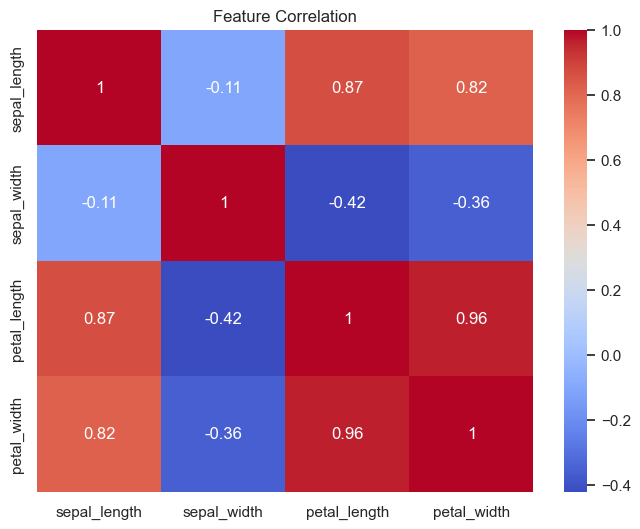

In [12]:
# Correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

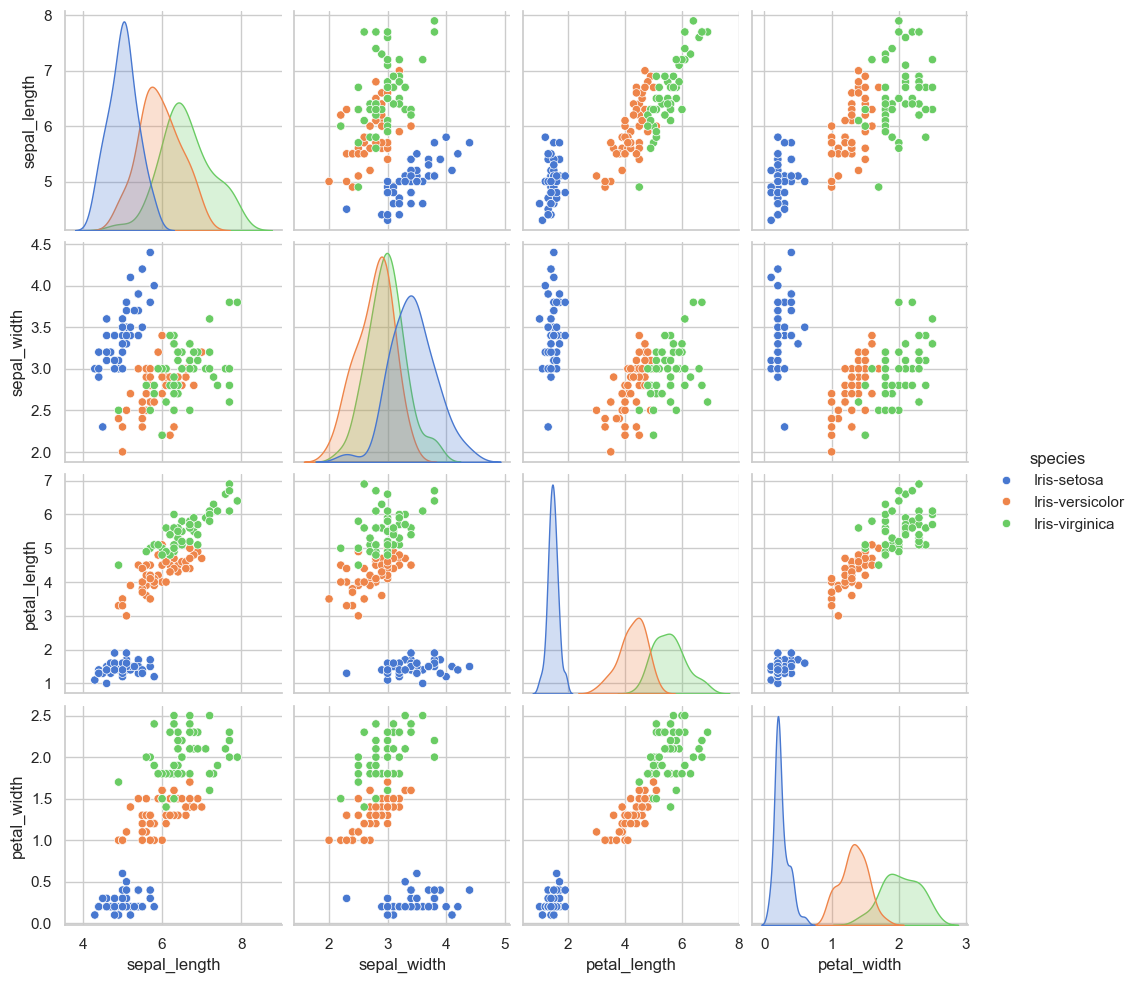

In [13]:
# check the pairplot
sns.pairplot(iris, hue='species')

In [14]:
iris_2 = iris.copy()   #duplicate the cleaned dataset befor machine learning

In [15]:
iris_2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


In [16]:
#from the heatmap, one of the feature of petal_length and petal_width needs to be dropped to avoid multicollinearity
iris_2 = iris_2.drop(columns=['petal_width'])
iris_2

,sepal_length,sepal_width,petal_length,species
0,5.10,3.50,1.40,Iris-setosa
1,4.90,3.00,1.40,Iris-setosa
2,4.70,3.20,1.30,Iris-setosa
3,4.60,3.10,1.50,Iris-setosa
4,5.00,3.60,1.40,Iris-setosa
...,...,...,...,...
145,6.70,3.00,5.20,Iris-virginica
146,6.30,2.50,5.00,Iris-virginica
147,6.50,3.00,5.20,Iris-virginica
148,6.20,3.40,5.40,Iris-virginica


In [17]:
#Encode species before modelling
le = LabelEncoder()
iris_2['species_encoded'] = le.fit_transform(iris_2['species'])
iris_2.head()

,sepal_length,sepal_width,petal_length,species,species_encoded
0,5.10,3.50,1.40,Iris-setosa,0
1,4.90,3.00,1.40,Iris-setosa,0
2,4.70,3.20,1.30,Iris-setosa,0
3,4.60,3.10,1.50,Iris-setosa,0
4,5.00,3.60,1.40,Iris-setosa,0


In [18]:
le.classes_  #to see the mapping

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
#Drop species features
iris_2 = iris_2.drop(columns = ['species'])
iris_2.head()

,sepal_length,sepal_width,petal_length,species_encoded
0,5.10,3.50,1.40,0
1,4.90,3.00,1.40,0
2,4.70,3.20,1.30,0
3,4.60,3.10,1.50,0
4,5.00,3.60,1.40,0


## Split to Train and Test

In [21]:
X = iris_2.drop(['species_encoded'], axis=1)
y = iris_2['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # stratify to maintain class balance

In [22]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [24]:
!pip install lazypredict

In [25]:
#Use of Lazy Predict to select top models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print(models)


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 3
[LightGBM] [Info] Start training from score -1.124588
[LightGBM] [Info] Start training from score -1.073294
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

## Pick top models from lazy predict and tune them

In [27]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Regularization types
    'solver': ['liblinear', 'saga'] # Solvers that support both l1 and l2
}

# Grid search
grid_search_lr = GridSearchCV(
    estimator=log_reg, 
    param_grid=param_grid,
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    scoring='accuracy'
)
grid_search_lr.fit(X_train, y_train)

# Best model
best_log_reg = grid_search_lr.best_estimator_
y_pred_lr = best_log_reg.predict(X_test)

# Results
print("Best Parameters:", grid_search_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

# Breakdown
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.9333333333333333
Precision: 0.9444
Recall: 0.9333
F1 Score: 0.9327

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [28]:
# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
print("Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost Tuned Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")

# Breakdown
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
XGBoost Tuned Results:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1 Score: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [29]:
#Random Forest
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Tuned Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

# Breakdown
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Tuned Results:
Accuracy: 0.9000
Precision: 0.9024
Recall: 0.9000
F1 Score: 0.8997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [31]:
#For SVC
# Define the model
svc_model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],                 # Regularisation parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']         # Kernel coefficient
}

# Setup GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search_svc.fit(X_train, y_train)

# Best model
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

# Evaluation
print("Best Parameters:", grid_search_svc.best_params_)
print("SVC Tuned Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Optional detailed breakdown
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVC Tuned Results:
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1 Score: 0.9666

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Evaluation and comparison

In [34]:
# Prepare an empty list to store results
results = []

# Define a helper function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })

# Evaluate all tuned models
evaluate_model('Logistic Regression', best_log_reg, X_test, y_test)
evaluate_model('Random Forest', best_rf, X_test, y_test)
evaluate_model('XGBoost', best_xgb, X_test, y_test)
evaluate_model('SVC', best_svc, X_test, y_test)

# Create DataFrame
results_iris_2 = pd.DataFrame(results)
results_iris_2 = results_iris_2.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display the table
print(results_iris_2)


                 Model  Accuracy  Precision  Recall  F1 Score
0                  SVC      0.97       0.97    0.97      0.97
1              XGBoost      0.93       0.93    0.93      0.93
2  Logistic Regression      0.93       0.94    0.93      0.93
3        Random Forest      0.90       0.90    0.90      0.90


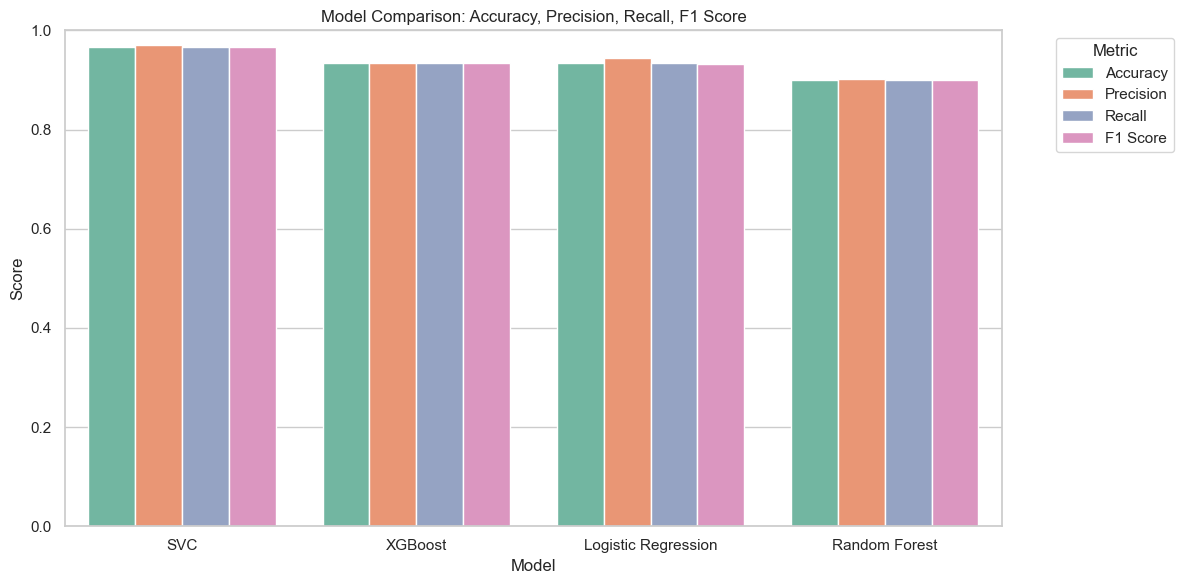

In [36]:
# Melt the DataFrame for seaborn
results_melted = pd.melt(results_iris_2, id_vars='Model', 
                         value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                         var_name='Metric', value_name='Score')

# Set the visual style
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='Set2')

# Customize the plot
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score')
plt.ylim(0, 1)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Actual vs Predicted Plot

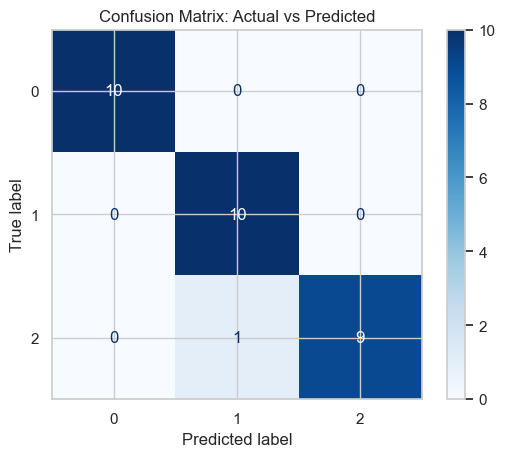

In [39]:
# Predict on test data
y_pred = best_svc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()

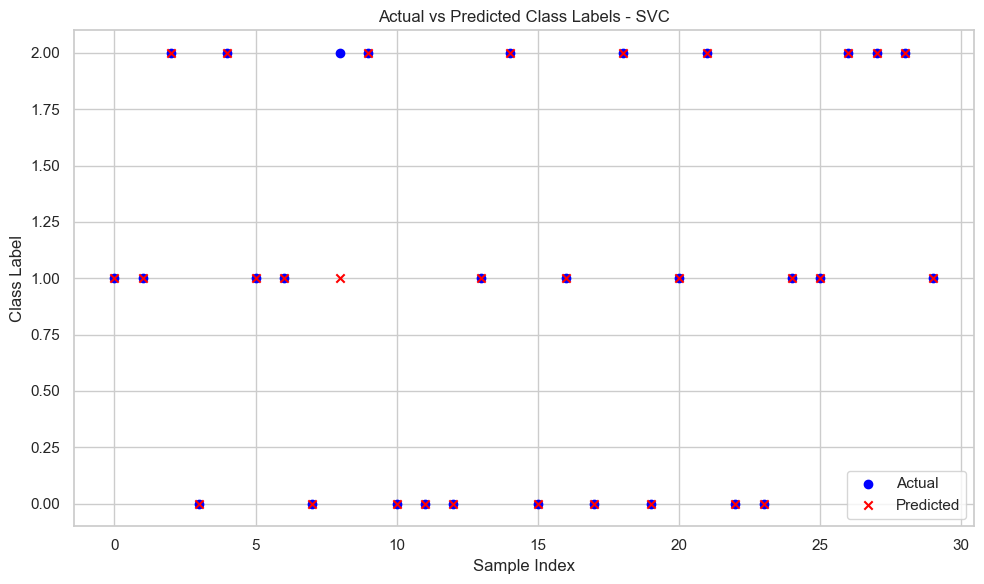

In [41]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
plt.scatter(range(len(y_pred_svc)), y_pred_svc, label='Predicted', marker='x', color='red')
plt.title('Actual vs Predicted Class Labels - SVC')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Residual Plot

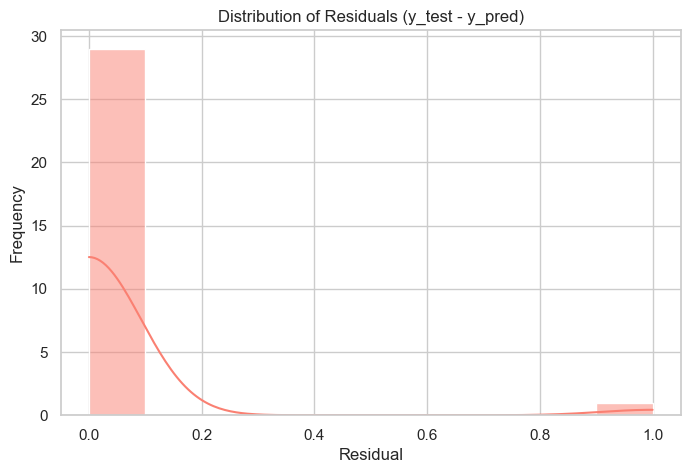

In [44]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=10, color='salmon')
plt.title("Distribution of Residuals (y_test - y_pred)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


## Most influencial features

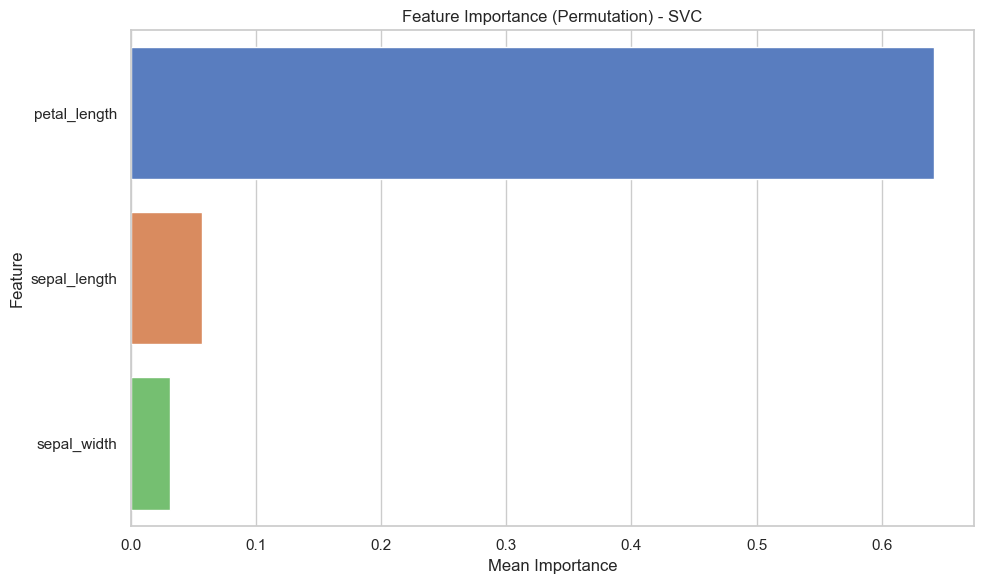

In [47]:
# Compute permutation importance
perm_importance = permutation_importance(best_svc, X_test, y_test, n_repeats=30, random_state=42, scoring='f1_weighted')

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='muted')
plt.title('Feature Importance (Permutation) - SVC')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()